In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
%matplotlib inline

## 5. Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df.

### Take a look at the first 10 rows.
### Look at the last 5 rows. Do you see a problem?
### Redo the read_csv() call to correct this issue - do not modify the original csv file.

In [2]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv')[:-2]
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN


In [3]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6729 entries, 0 to 6728
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6729 non-null   object 
 1   Year             6729 non-null   object 
 2   Value            6729 non-null   float64
 3   Value Footnotes  1 non-null      float64
dtypes: float64(2), object(2)
memory usage: 210.4+ KB


In [203]:
#gdp_df = pd.read_csv("../gdp_per_capita.csv", nrows=6727)

In [204]:
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN
5,Afghanistan,2013,1807.762344,NaN
6,Afghanistan,2012,1772.764974,NaN
7,Afghanistan,2011,1626.764793,NaN
8,Afghanistan,2010,1671.581238,NaN
9,Afghanistan,2009,1502.354073,NaN


In [205]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN


In [206]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6729 entries, 0 to 6728
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6729 non-null   object 
 1   Year             6729 non-null   object 
 2   Value            6729 non-null   float64
 3   Value Footnotes  1 non-null      float64
dtypes: float64(2), object(2)
memory usage: 210.4+ KB


## 6. Drop the 'Value Footnotes' column, and rename the remaining columns to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [207]:
gdp_df = gdp_df.drop(columns=['Value Footnotes'])
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6729 entries, 0 to 6728
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6729 non-null   object 
 1   Year             6729 non-null   object 
 2   Value            6729 non-null   float64
dtypes: float64(1), object(2)
memory usage: 157.8+ KB


In [208]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6729 entries, 0 to 6728
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6729 non-null   object 
 1   Year            6729 non-null   object 
 2   GDP_Per_Capita  6729 non-null   float64
dtypes: float64(1), object(2)
memory usage: 157.8+ KB


## 7. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

In [209]:
gdp_df.Year = gdp_df.Year.astype(int)
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6729 entries, 0 to 6728
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6729 non-null   object 
 1   Year            6729 non-null   int64  
 2   GDP_Per_Capita  6729 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 157.8+ KB


## 8. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

The years 1990 through 2018 are represented in the dataset. The number of participating countries peaked in 2011 with 243 countries reporting data.

In [210]:
gdp_df.Year.max()

2018

In [211]:
gdp_df.Year.min()

1990

In [212]:
gdp_df.Year.value_counts()

2011    243
2012    241
2009    241
2010    241
2013    241
2015    240
2008    240
2014    240
2007    239
2016    239
2017    239
2005    238
2004    238
2002    238
2006    238
2003    238
2001    237
2000    236
1999    228
1998    227
2018    226
1997    226
1996    224
1995    224
1994    218
1993    215
1992    213
1991    211
1990    210
Name: Year, dtype: int64

In [213]:
gdp_df.Country.value_counts()

Micronesia                                            29
St. Kitts and Nevis                                   29
New Zealand                                           29
Lao PDR                                               29
Malta                                                 29
Mexico                                                29
Euro area                                             29
United Arab Emirates                                  29
Guinea                                                29
Sub-Saharan Africa                                    29
Algeria                                               29
Zambia                                                29
Mongolia                                              29
Bangladesh                                            29
Armenia                                               29
IDA & IBRD total                                      29
Eswatini                                              29
Argentina                      

## 9. How many countries are represented in data set?

In [214]:
gdp_df.Country.nunique()

243

In [215]:
gdp_df.groupby('Country')['Year'].nunique()

Country
Afghanistan                                           17
Albania                                               29
Algeria                                               29
Angola                                                29
Antigua and Barbuda                                   29
Arab World                                            29
Argentina                                             29
Armenia                                               29
Aruba                                                 28
Australia                                             29
Austria                                               29
Azerbaijan                                            29
Bahrain                                               29
Bangladesh                                            29
Barbados                                              29
Belarus                                               29
Belgium                                               29
Belize                 

In [216]:
gdp_df.groupby('Year')['Country'].nunique()

Year
1990    210
1991    211
1992    213
1993    215
1994    218
1995    224
1996    224
1997    226
1998    227
1999    228
2000    236
2001    237
2002    238
2003    238
2004    238
2005    238
2006    238
2007    239
2008    240
2009    241
2010    241
2011    243
2012    241
2013    241
2014    240
2015    240
2016    239
2017    239
2018    226
Name: Country, dtype: int64

What countries are least represented in the data?  : Nauru, Sint Maarten, Turks & Caicos Islands, South Sudan, Djibouti are least represented. 

## 10. Create new dataframe by subsetting gdp_df to just the year 2014

In [217]:
gdp_2014 = gdp_df[gdp_df['Year'] == 2014]
gdp_2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 4 to 6704
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         240 non-null    object 
 1   Year            240 non-null    int64  
 2   GDP_Per_Capita  240 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 7.5+ KB


In [218]:
gdp_2014.head()

,Country,Year,GDP_Per_Capita
4,Afghanistan,2014,1795.735834
21,Albania,2014,10700.993216
50,Algeria,2014,13557.769757
79,Angola,2014,6813.052106
108,Antigua and Barbuda,2014,20440.540555


In [219]:
gdp_2014.sample(5)

,Country,Year,GDP_Per_Capita
3808,Malta,2014,32008.367472
1217,Congo,2014,5694.862421
2812,Iraq,2014,15094.570504
6015,The Gambia,2014,2203.733684
2524,Hungary,2014,24220.733937


## 11. Use .describe() to find the summary statistics for GDP per capita in 2014

In [220]:
gdp_2014.describe()
gdp_2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 4 to 6704
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         240 non-null    object 
 1   Year            240 non-null    int64  
 2   GDP_Per_Capita  240 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 7.5+ KB


## 12. Create a histogram of GDP Per Capita numbers for 2014 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

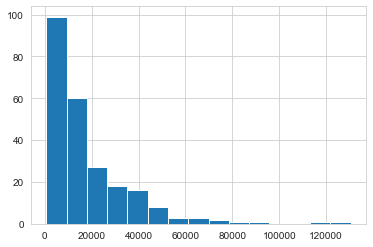

In [221]:
gdp_2014.GDP_Per_Capita.hist(bins = 15)

The shape of the distribution is right skewed.

## 13. Find the top 5 counties and bottom 5 countries by GDP per capita in 2014


In [222]:
gdp_2014.sort_values('GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
1014,Central African Republic,2014,672.681648
794,Burundi,2014,768.469837
1375,Dem. Rep. Congo,2014,784.872656
4414,Niger,2014,900.136918
3697,Malawi,2014,1142.530804
4199,Mozambique,2014,1222.452874
3460,Liberia,2014,1257.625441
1799,Ethiopia,2014,1413.962518
6063,Togo,2014,1423.553002
2321,Guinea-Bissau,2014,1425.770644


## 14. Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2017 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2017. Save the result to a dataframe named gdp_pivoted.


If you do this, you will create a multi-level index: 
gdp_pivoted = gdp_pivoted.pivot_table(values = ['GDP_Per_Capita'], index = ['Country'], columns = ['Year']).dropna()

If you do this, you'll create a single-level index: 
gdp_pivoted = gdp_pivoted.pivot_table(values = 'GDP_Per_Capita', index = 'Country', columns = 'Year').dropna()
gdp_pivoted.columns will tell you what you should be calling to grab

gdp_pivoted['Percent_Change'] = 100 * ((gdp_pivoted[2017] - gdp_pivoted[1990]) / gdp_pivoted[1990]) 

In [223]:
gdp_df[(gdp_df['Year']==1990) | (gdp_df['Year']==2017)].pivot_table(values='GDP_Per_Capita', index='Country', columns='Year')

Year,1990,2017
Country,,
Afghanistan,NaN,1758.465636
Albania,4458.247115,11796.719185
Algeria,10300.015042,13822.389087
Angola,4761.229638,6044.972035
Antigua and Barbuda,17454.549799,22400.379562
Arab World,10491.507721,15542.746104
Argentina,11372.823108,18945.144022
Armenia,3742.431024,8744.731368
Aruba,37140.024657,35861.828118


In [224]:
gdp_pivoted = gdp_df[(gdp_df['Year']==1990) | (gdp_df['Year']==2017)].pivot_table(values='GDP_Per_Capita', index='Country', columns='Year').dropna()
gdp_pivoted

Year,1990,2017
Country,,
Albania,4458.247115,11796.719185
Algeria,10300.015042,13822.389087
Angola,4761.229638,6044.972035
Antigua and Barbuda,17454.549799,22400.379562
Arab World,10491.507721,15542.746104
Argentina,11372.823108,18945.144022
Armenia,3742.431024,8744.731368
Aruba,37140.024657,35861.828118
Australia,28669.059474,44781.322760


In [225]:
#gdp_pivoted = gdp_df.pivot_table(columns=['Year'], index=['Country'], values='GDP_Per_Capita')[[1990, 2017]].dropna()


In [226]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
gdp_pivoted

Year,1990,2017
Country,,
Albania,4458.247115,11796.719185
Algeria,10300.015042,13822.389087
Angola,4761.229638,6044.972035
Antigua and Barbuda,17454.549799,22400.379562
Arab World,10491.507721,15542.746104
Argentina,11372.823108,18945.144022
Armenia,3742.431024,8744.731368
Aruba,37140.024657,35861.828118
Australia,28669.059474,44781.322760


## 15. Create a new column in gdp_pivoted named Percent_Change. This column should contain the percent change in GDP_Per_Capita from 1990 to 2017. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

https://stackoverflow.com/questions/42100058/percentage-difference-between-any-two-columns-of-pandas-dataframe

In [227]:
gdp_pivoted['Percent_Change'] = gdp_pivoted.apply(lambda row: (row.iloc[1]-row.iloc[0])/row.iloc[0]*100, axis=1)

In [228]:
gdp_pivoted

Year,1990,2017,Percent_Change
Country,,,
Albania,4458.247115,11796.719185,164.604426
Algeria,10300.015042,13822.389087,34.197756
Angola,4761.229638,6044.972035,26.962413
Antigua and Barbuda,17454.549799,22400.379562,28.335476
Arab World,10491.507721,15542.746104,48.145972
Argentina,11372.823108,18945.144022,66.582596
Armenia,3742.431024,8744.731368,133.664463
Aruba,37140.024657,35861.828118,-3.441561
Australia,28669.059474,44781.322760,56.200879


In [229]:
#gdp_pivoted['Percent_Change'] = 100 * (gdp_pivoted[2017] - gdp_pivoted[1990]) / gdp_pivoted[1990]

#gdp_pivoted_negative = gdp_pivoted[gdp_pivoted["Percent_Change"] < 0]
#gdp_pivoted_negative_sorted = gdp_pivoted_negative.sort_values(by=['Percent_Change'])
#gdp_pivoted_negative_sorted

## 16. How many countries experienced a negative percent change in GDP per capita from 1990 to 2017?

In [230]:
gdp_pivoted[gdp_pivoted['Percent_Change']< 0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, Aruba to Zimbabwe
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   1990            20 non-null     float64
 1   2017            20 non-null     float64
 2   Percent_Change  20 non-null     float64
dtypes: float64(3)
memory usage: 640.0+ bytes


In [231]:
gdp_pivoted.sample(10)

Year,1990,2017,Percent_Change
Country,,,
United Kingdom,26551.720271,40228.662972,51.510571
Europe & Central Asia,20617.655193,30095.126091,45.967744
East Asia & Pacific (IDA & IBRD),2246.661835,13686.880719,509.209651
Dominica,6658.256035,9679.666135,45.378401
Australia,28669.059474,44781.322760,56.200879
Slovenia,18982.925424,31448.853912,65.669164
Namibia,5713.197044,10093.233186,76.665239
IDA only,1529.544995,2798.497648,82.962754
Tunisia,5608.331248,10950.027386,95.245732


## 17. Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2017. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?
Bonus: Put both line charts on the same plot.

In [232]:
gdp_pivoted.sort_values(by='Percent_Change', ascending=False)

Year,1990,2017,Percent_Change
Country,,,
Equatorial Guinea,1017.764136,22298.942144,2090.973464
China,1521.963868,15253.993071,902.257241
Myanmar,730.228038,5610.324700,668.297629
East Asia & Pacific (excluding high income),2222.407152,13544.178535,509.437318
East Asia & Pacific (IDA & IBRD),2246.661835,13686.880719,509.209651
Vietnam,1457.594613,6233.485045,327.655604
Bhutan,2259.568462,9042.907491,300.205068
Cabo Verde,1676.190288,6367.984878,279.908231
Lao PDR,1708.034226,6310.067080,269.434463


In [233]:
china_eqguinea = gdp_df.copy()

china_eqguinea = china_eqguinea[(china_eqguinea['Country'] == 'Equatorial Guinea')|(china_eqguinea['Country'] == 'China')]

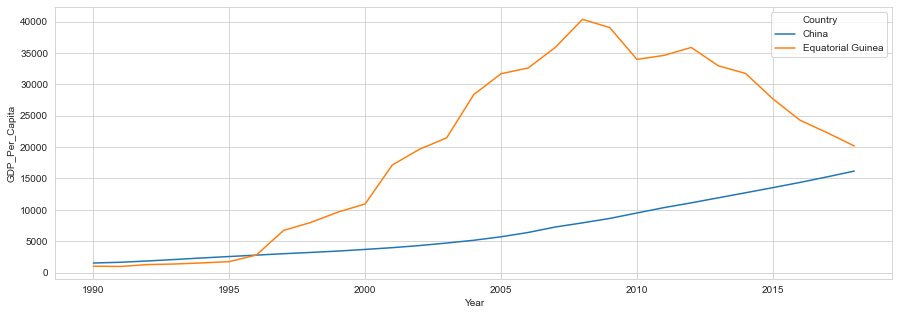

In [234]:
plt.figure(figsize=(15,5))
sns.set_style("whitegrid")
sns.lineplot(data= china_eqguinea, x = 'Year', y='GDP_Per_Capita', hue ='Country');

In [235]:
#gdp_df_large = gdp_df.loc[gdp_df['Country'].isin(distinct_countries)]
#fig, ax = plt.subplots()
#gdp_df_large.groupby('Country').plot(x='Year', y='GDP_Per_Capita', ax=ax);

## 18. Read in continents.csv contained in the data folder into a new dataframe called continents. We will be using this dataframe to add a new column to our dataset.

In [236]:
continents = pd.read_csv('../data/continents.csv')
continents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Continent  216 non-null    object
 1   Country    216 non-null    object
dtypes: object(2)
memory usage: 3.5+ KB


## 19. Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

In [237]:
gdp_df.columns

Index(['Country', 'Year', 'GDP_Per_Capita'], dtype='object')

In [238]:
continents.columns

Index(['Continent', 'Country'], dtype='object')

In [239]:
gdp_df = gdp_df.merge(continents, on='Country', how='inner')
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5334 entries, 0 to 5333
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         5334 non-null   object 
 1   Year            5334 non-null   int64  
 2   GDP_Per_Capita  5334 non-null   float64
 3   Continent       5334 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 208.4+ KB


In [240]:
gdp_df.head()

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2018,1734.723214,Asia
1,Afghanistan,2017,1758.465636,Asia
2,Afghanistan,2016,1757.023490,Asia
3,Afghanistan,2015,1766.593077,Asia
4,Afghanistan,2014,1795.735834,Asia


In [241]:
gdp_df.head()

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2018,1734.723214,Asia
1,Afghanistan,2017,1758.465636,Asia
2,Afghanistan,2016,1757.023490,Asia
3,Afghanistan,2015,1766.593077,Asia
4,Afghanistan,2014,1795.735834,Asia


## 20. Determine the number of countries per continent. Create a bar chart showing this.

#### Using value_counts() much less clean than nunique().  Value counts returned multilevel index with continent and country both.
gdp_df.groupby('Continent')['Country'].value_counts()

In [242]:
gdp_df.groupby('Continent')['Country'].nunique()

Continent
Africa           51
Asia             44
Europe           45
North America    26
Oceania          14
South America    12
Name: Country, dtype: int64

In [243]:
#plt.figure(figsize=(15,5))
#sns.set_style("whitegrid")
#sns.countplot(data= gdp_df.groupby('Continent')['Country'].nunique(), x = 'Continent');

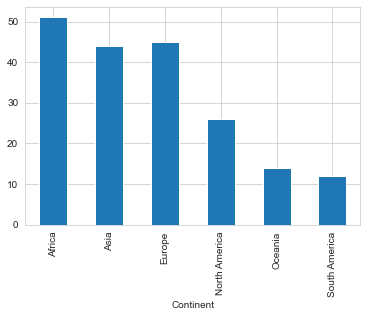

In [244]:
gdp_df.groupby('Continent')['Country'].nunique().plot(kind = 'bar')
plt.show()

## 21. Creat a seaborn boxplot showing GDP per capita in 2014 split out by continent. What do you notice?

In [245]:
gdp_continent_2014 = gdp_df.copy()
gdp_continent_2014 = gdp_df[gdp_df['Year']==2014]
gdp_continent_2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189 entries, 4 to 5309
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         189 non-null    object 
 1   Year            189 non-null    int64  
 2   GDP_Per_Capita  189 non-null    float64
 3   Continent       189 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 7.4+ KB


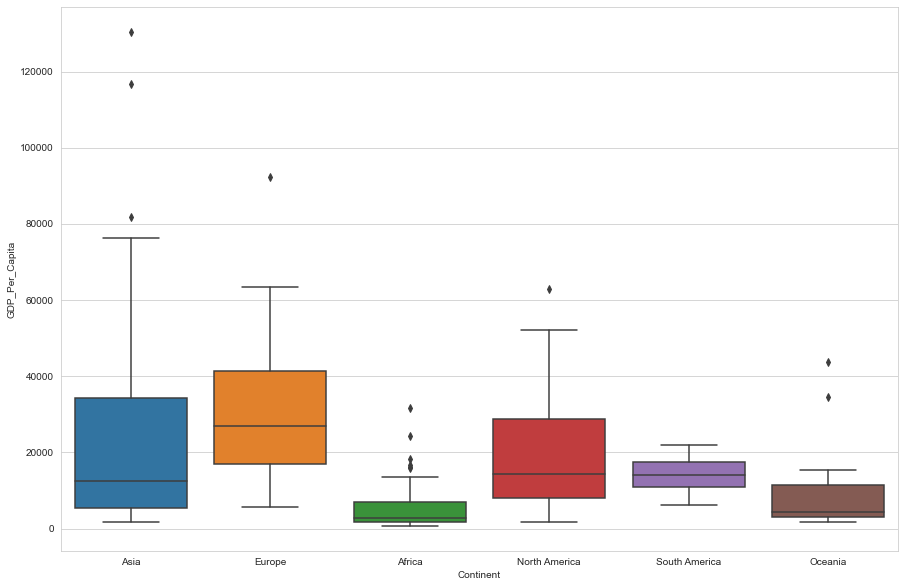

In [246]:
plt.figure(figsize=(15,10))
sns.boxplot( x=gdp_continent_2014['Continent'], y=gdp_continent_2014['GDP_Per_Capita']);
plt.show()

## 22. Read in internet_use.csv into a DataFrame called internet_df. You will most likely get an error message when doing this - figure out what is going wrong and fix it. Take a look at the first and last five rows and make any corrections to your read_csv() call to fix this. Again, do not modify the original datasets.

In [247]:
#internet_df = pd.read_csv('../data/internet_use.csv', error_bad_lines = False)
#internet_df.info()

In [248]:
#internet_df = pd.read_csv('../data/internet_use.csv', skiprows=list(range(4497,4688)))

In [249]:
internet_df = pd.read_csv('../data/internet_use.csv', usecols=['Country or Area', 'Year', 'Value'])[:-181]
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country or Area  4495 non-null   object
 1   Year             4495 non-null   object
 2   Value            4495 non-null   object
dtypes: object(3)
memory usage: 105.5+ KB


In [250]:
internet_df.head()

,Country or Area,Year,Value
0,Afghanistan,2014,6.39
1,Afghanistan,2013,5.9
2,Afghanistan,2012,5.45454545454545
3,Afghanistan,2011,5
4,Afghanistan,2010,4


In [251]:
internet_df.tail()

,Country or Area,Year,Value
4490,Zimbabwe,1997,0.033080326724463
4491,Zimbabwe,1996,0.016790483892511
4492,Zimbabwe,1995,0.00768353991953285
4493,Zimbabwe,1994,0.00173927955909959
4494,Zimbabwe,1990,0


## 23. Drop the Value Footnotes column and then rename the columns to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

Alternately: internet_df = internet_df.drop(columns=['Value Footnotes'])

Two options here - explicitly drop Value_Footnotes column OR pass in list of column names and exclude that one

In [252]:
internet_df.columns=['Country', 'Year', 'Internet_Users_Pct']
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             4495 non-null   object
 1   Year                4495 non-null   object
 2   Internet_Users_Pct  4495 non-null   object
dtypes: object(3)
memory usage: 105.5+ KB


### Change Year and Internet_Users_Pct to numbers

alternately:
gdp_df.Year = gdp_df.Year.astype(int)


In [253]:
internet_df[['Year', 'Internet_Users_Pct']] = internet_df[['Year', 'Internet_Users_Pct']].apply(pd.to_numeric, errors = 'coerce')
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             4495 non-null   object 
 1   Year                4495 non-null   int64  
 2   Internet_Users_Pct  4495 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 105.5+ KB


## 24. How many rows and columns does this new dataset have? What are the types of its columns? Ensure that the Internet_Users_Pct column is a numeric data type and fix it if it is not.

In [254]:
internet_df.shape

(4495, 3)

In [255]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             4495 non-null   object 
 1   Year                4495 non-null   int64  
 2   Internet_Users_Pct  4495 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 105.5+ KB


## 25. What is the first year that has a nonzero internet users percentage reported? What is the general trend in internet users percentage over the years. Pick a visualization that you think illustrates this trend well.

In [256]:
#internet_df.groupby(['Year','Country'])['Internet_Users_Pct'].sum()

In [257]:
internet_df.groupby('Year')['Internet_Users_Pct'].sum()

Year
1960       0.000000
1965       0.000000
1970       0.000000
1975       0.000000
1976       0.000000
1977       0.000000
1978       0.000000
1979       0.000000
1980       0.000000
1981       0.000000
1982       0.000000
1983       0.000000
1984       0.000000
1985       0.000000
1986       0.000000
1987       0.000000
1988       0.000000
1989       0.000000
1990       5.032933
1991      10.931876
1992      19.951850
1993      30.144702
1994      60.571026
1995     131.726726
1996     253.150223
1997     454.897179
1998     750.253424
1999    1172.587525
2000    1768.346984
2001    2198.771961
2002    2813.872118
2003    3250.897681
2004    3794.284115
2005    4278.601987
2006    4783.780564
2007    5290.186501
2008    5814.472583
2009    6338.399306
2010    6959.455800
2011    7779.505598
2012    8191.847053
2013    8654.211824
2014    9140.469980
Name: Internet_Users_Pct, dtype: float64

In [258]:
internet_df[internet_df['Internet_Users_Pct'] > 0].sort_values('Year')

,Country,Year,Internet_Users_Pct
2048,Italy,1990,0.017545
1107,Denmark,1990,0.097277
375,Belgium,1990,0.001007
1388,Finland,1990,0.401088
4301,United States,1990,0.784729
...,...,...,...
2175,Kiribati,2014,12.250000
848,Colombia,2014,52.570000
1299,Ethiopia,2014,2.900000
623,Burundi,2014,1.380000


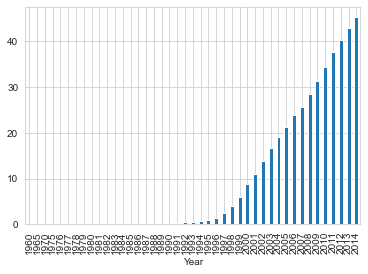

In [259]:
internet_df.groupby('Year')['Internet_Users_Pct'].mean().plot(kind='bar')

In [260]:
#gdp_df.groupby('Continent_x')['Country'].nunique().plot(kind = 'bar')
#plt.show()

## 26. Merge gdp_df and internet_df (on Country and Year) into a single DataFrame named gdp_and_internet_use. Keep only countries and years that appear in both tables.

### Difficult Bonus: Do not attempt this part until you have completed all other portions of the data question. Some countries have slightly different names in the internet use and gdp dataframes. For example, the Central African Republic is "Central African Republic" in the gdp dataframe and "Central African Rep." in the internet use dataframe. Find as many instances like this as you can and resolve them so that when merging you keep the maximum number of countries possible.
--> Use anti join to find the mismatching names. Then if/elif/else to rename OR perhaps dictionary
Then repeat the merge and see what changes.

In [261]:
gdp_df['Country'].nunique()

192

In [262]:
internet_df['Country'].nunique()

213

In [263]:
#country_name_cleanup=gdp_df.merge(internet_df, on=['Country'], how='outer', indicator = True)
#country_name_cleanup.info()

In [264]:
#country_name_cleanup['_merge'].value_counts()

In [265]:
#country_name_cleanup['Country'].nunique()

In [266]:
#country_list_right = country_name_cleanup.loc[country_name_cleanup['_merge'] == 'right_only', 'Country']

In [267]:
#country_list_left = country_name_cleanup.loc[country_name_cleanup['_merge'] == 'left_only', 'Country']

In [268]:
#country_list_both = country_name_cleanup.loc[country_name_cleanup['_merge'] == 'both', 'Country']

In [269]:
#country_list_right.unique()

In [270]:
#country_list_left.unique()

In [271]:
#country_list_both.unique()

#### Download the UN metadata on country names that includes the country code, short name, table name, political name.  Create a dictionary using the short name and table name.  Then map dictionary to data. 

In [272]:
country_metadata=pd.read_csv('../data/country_metadata.csv')
country_metadata.columns

Index(['Code', 'Long Name', 'Income Group', 'Region', 'Lending category',
       'Other groups', 'Currency Unit', 'Latest population census',
       'Latest household survey', 'Special Notes',
       'National accounts base year', 'National accounts reference year',
       'System of National Accounts', 'SNA price valuation',
       'Alternative conversion factor', 'PPP survey years',
       'Balance of Payments Manual in use', 'External debt Reporting status',
       'System of trade', 'Government Accounting concept',
       'IMF data dissemination standard',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data', '2-alpha code',
       'WB-2 code', 'Table Name', 'Short Name'],
      dtype='object')

In [273]:
country_dict = country_metadata.copy()

In [274]:
country_dict = country_dict.drop(columns=['Code', 'Long Name', 'Income Group', 'Region', 'Lending category',
       'Other groups', 'Currency Unit', 'Latest population census',
       'Latest household survey', 'Special Notes',
       'National accounts base year', 'National accounts reference year',
       'System of National Accounts', 'SNA price valuation',
       'Alternative conversion factor', 'PPP survey years',
       'Balance of Payments Manual in use', 'External debt Reporting status',
       'System of trade', 'Government Accounting concept',
       'IMF data dissemination standard',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data', '2-alpha code',
       'WB-2 code'])

In [275]:
country_dict = country_dict[['Short Name', 'Table Name']]

In [276]:
country_dict.head()

,Short Name,Table Name
0,Afghanistan,Afghanistan
1,Albania,Albania
2,Algeria,Algeria
3,American Samoa,American Samoa
4,Andorra,Andorra


https://stackoverflow.com/questions/18695605/python-pandas-dataframe-to-dictionary
dict(df.values.tolist())

In [277]:
country_dict = dict(country_dict.values.tolist())

In [279]:
gdp_df['Country'] = gdp_df['Country'].map(country_dict).fillna(gdp_df['Country'])

In [278]:
country_dict

{'Afghanistan': 'Afghanistan',
 'Albania': 'Albania',
 'Algeria': 'Algeria',
 'American Samoa': 'American Samoa',
 'Andorra': 'Andorra',
 'Angola': 'Angola',
 'Antigua and Barbuda': 'Antigua and Barbuda',
 'Argentina': 'Argentina',
 'Armenia': 'Armenia',
 'Aruba': 'Aruba',
 'Australia': 'Australia',
 'Austria': 'Austria',
 'Azerbaijan': 'Azerbaijan',
 'The Bahamas': 'Bahamas, The',
 'Bahrain': 'Bahrain',
 'Bangladesh': 'Bangladesh',
 'Barbados': 'Barbados',
 'Belarus': 'Belarus',
 'Belgium': 'Belgium',
 'Belize': 'Belize',
 'Benin': 'Benin',
 'Bermuda': 'Bermuda',
 'Bhutan': 'Bhutan',
 'Bolivia': 'Bolivia',
 'Bosnia and Herzegovina': 'Bosnia and Herzegovina',
 'Botswana': 'Botswana',
 'Brazil': 'Brazil',
 'Brunei': 'Brunei Darussalam',
 'Bulgaria': 'Bulgaria',
 'Burkina Faso': 'Burkina Faso',
 'Burundi': 'Burundi',
 'Cabo Verde': 'Cabo Verde',
 'Cambodia': 'Cambodia',
 'Cameroon': 'Cameroon',
 'Canada': 'Canada',
 'Cayman Islands': 'Cayman Islands',
 'Central African Republic': 'Centra

### Now map the country_dict variable to the Country column of the gdp_df

Non-Exhaustive Mapping
If you have a non-exhaustive mapping and wish to retain the existing variables for non-matches, you can add fillna:

df['col1'].map(di).fillna(df['col1'])

### Now re-run the original question: Merge gdp_df and internet_df (on Country and Year) into a single DataFrame named gdp_and_internet_use. Keep only countries and years that appear in both tables.

In [280]:
gdp_and_internet_use=gdp_df.merge(internet_df, on=['Country','Year'], how='inner')
gdp_and_internet_use.columns

Index(['Country', 'Year', 'GDP_Per_Capita', 'Continent', 'Internet_Users_Pct'], dtype='object')

In [281]:
gdp_and_internet_use.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3429 entries, 0 to 3428
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             3429 non-null   object 
 1   Year                3429 non-null   int64  
 2   GDP_Per_Capita      3429 non-null   float64
 3   Continent           3429 non-null   object 
 4   Internet_Users_Pct  3429 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 160.7+ KB


## 27. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

In [282]:
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,Asia,6.390000
1,Afghanistan,2013,1807.762344,Asia,5.900000
2,Afghanistan,2012,1772.764974,Asia,5.454545
3,Afghanistan,2011,1626.764793,Asia,5.000000
4,Afghanistan,2010,1671.581238,Asia,4.000000


In [283]:
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
3424,Zimbabwe,1997,3036.422224,Africa,0.033080
3425,Zimbabwe,1996,2985.856605,Africa,0.016790
3426,Zimbabwe,1995,2736.486436,Africa,0.007684
3427,Zimbabwe,1994,2768.309953,Africa,0.001739
3428,Zimbabwe,1990,2819.549467,Africa,0.000000


## 28. Create a new DataFrame, named gdp_and_internet_use_2014 by extracting data for the year 2014 from gdp_and_internet_use. What is the mean internet users percentage in 2014? How many countries have at least 90% internet users in 2014?


Mean internet use percent in 2014 is 44.7%


In [284]:
gdp_and_internet_use_2014 = gdp_and_internet_use.copy()
gdp_and_internet_use_2014 = gdp_and_internet_use_2014[gdp_and_internet_use_2014['Year']== 2014]
gdp_and_internet_use_2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 0 to 3407
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             160 non-null    object 
 1   Year                160 non-null    int64  
 2   GDP_Per_Capita      160 non-null    float64
 3   Continent           160 non-null    object 
 4   Internet_Users_Pct  160 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 7.5+ KB


In [285]:
gdp_and_internet_use_2014.describe()

,Year,GDP_Per_Capita,Internet_Users_Pct
count,160.0,160.000000,160.000000
mean,2014.0,18996.674487,45.039687
std,0.0,19829.209119,29.488788
min,2014.0,768.469837,1.140000
25%,2014.0,4162.098972,17.452500
50%,2014.0,12368.646322,44.195000
75%,2014.0,27036.791294,70.527500
max,2014.0,116693.507701,98.160000


In [286]:
gdp_and_internet_use_2014[gdp_and_internet_use_2014['Internet_Users_Pct']>=90].nunique()

Country               12
Year                   1
GDP_Per_Capita        12
Continent              2
Internet_Users_Pct    12
dtype: int64

## 29. Find the countries that had the top 3 largest GDP per capita figures for 2014. Create a seaborn FacetGrid showing the change in internet user percentage over time for these three countries. Each individual figure in the facet grid will represent a single country. What trends do you notice?

df.sort_values() --> Qatar, Luxembourg, Singapore

In [287]:
gdp_and_internet_use_2014.sort_values(by=['GDP_Per_Capita'],ascending=False)

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
2534,Qatar,2014,116693.507701,Asia,91.49000
1790,Luxembourg,2014,92349.186429,Europe,94.67000
2719,Singapore,2014,81965.361071,Asia,82.00000
496,Brunei Darussalam,2014,76448.593329,Asia,68.77000
1663,Kuwait,2014,72588.670676,Asia,78.70000
2288,Norway,2014,63328.259526,Europe,96.30000
647,Cayman Islands,2014,62929.873118,North America,74.10000
3251,United Arab Emirates,2014,62879.703021,Asia,90.40000
2971,Switzerland,2014,57218.023232,Europe,87.00000
3297,United States,2014,52080.792568,North America,87.36000


In [288]:
top_gdp_list = ['Qatar','Luxembourg','Singapore']

top_gdp_df = gdp_and_internet_use.copy()
top_gdp_df = top_gdp_df[top_gdp_df['Country'].isin(top_gdp_list)]

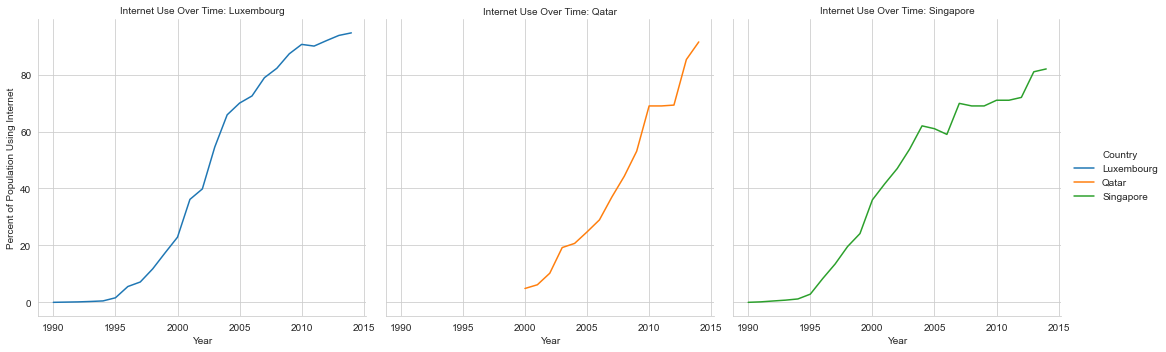

In [292]:
sns.set_style('whitegrid')
g = sns.relplot(
    data=top_gdp_df,
    x="Year", y="Internet_Users_Pct",
    hue="Country", col="Country",
    height=5, aspect=1, kind="line"
)
(g.set_axis_labels("Year", "Percent of Population Using Internet")
  .set_titles("Internet Use Over Time: {col_name}")
);

To stack veritcally, pass in row='Country' argument. The x-axis labels do not reproduce for each individual figure in facet grid (same as y-axis above). Figsize is larger, but more difficult to read w/o x-lablels. 

Find argument to fix this --> https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

sns.set_style('whitegrid')
g = sns.relplot(
    data=top_gdp_df,
    x="Year", y="Internet_Users_Pct",
    hue="Country", row="Country",
    height=4, aspect=1.9, kind="line"
)
(g.set_axis_labels("Year", "Internet Users as % Population")
  .set_titles("Internet Use Over Time: {row_name}")
);

## 30. Create a scatter plot of Internet Use vs GDP per Capita for the year 2014. What do you notice?


In [293]:
#gdp_and_internet_use_2014.plot(kind = 'scatter', y = 'GDP_Per_Capita', x = 'Internet_Users_Pct');

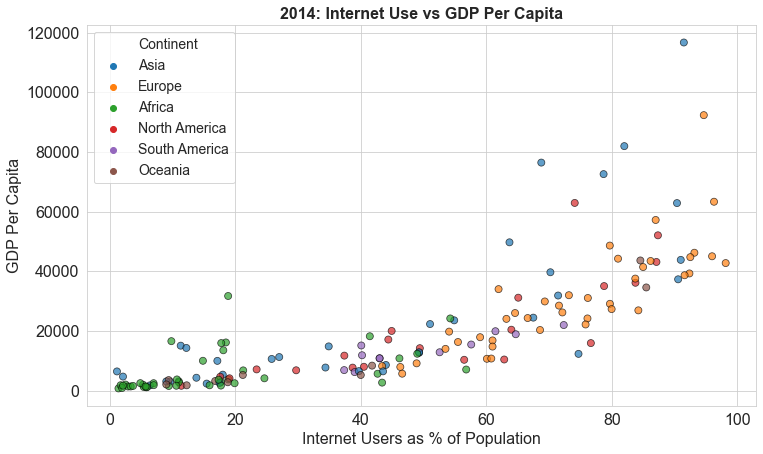

In [294]:
fontsize = 16

plt.figure(figsize = (12,7))
sns.scatterplot(data = gdp_and_internet_use_2014, x = 'Internet_Users_Pct', y = 'GDP_Per_Capita', s = 50,
                hue = 'Continent',
                alpha = 0.7, edgecolor = 'black')
plt.xticks(fontsize = fontsize)
plt.xlabel('Internet Users as % of Population', fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.ylabel('GDP Per Capita', fontsize = fontsize)
plt.title('2014: Internet Use vs GDP Per Capita', fontsize = fontsize, fontweight = 'bold')
plt.legend(fontsize = fontsize - 2);

## 31. Find the correlation between GDP per Capita and Internet Use for the year 2014. What is the meaning of this number?

The correlation coefficient returns Pearson's 'r' value, which indicates the strength of a linear relationship between two variables.  The r value here indicates there is a fairly strong linear relationship between internet use and GDP per capita.

In [295]:
#Pandas .corr() applied across columns of dataframe with suitable dtypes returns answer as a dataframe
gdp_and_internet_use_2014.corr()

,Year,GDP_Per_Capita,Internet_Users_Pct
Year,NaN,NaN,NaN
GDP_Per_Capita,NaN,1.000000,0.779625
Internet_Users_Pct,NaN,0.779625,1.000000


In [296]:
#Pandas .corr() for only the two columns interested in returns answer as a single value
gdp_and_internet_use_2014['GDP_Per_Capita'].corr(gdp_and_internet_use_2014['Internet_Users_Pct'])

0.7796248634700225

In [297]:
#Numpy np.corcoef() passing in the two columns returns answer as array
np.corrcoef(gdp_and_internet_use_2014['GDP_Per_Capita'], gdp_and_internet_use_2014['Internet_Users_Pct'])

array([[1.        , 0.77962486],
       [0.77962486, 1.        ]])

## 32. Add a column to gdp_and_internet_use_2014 and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and internet users percentage. How does this compare to the calculation in the previous part?

When the log is applied to GDP Per Capita, the strength of the correlation increases from 0.78 to 0.85

In [298]:
gdp_and_internet_use_2014['GDP_Per_Capita_Log']= np.log(gdp_and_internet_use_2014['GDP_Per_Capita'])
gdp_and_internet_use_2014.head()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct,GDP_Per_Capita_Log
0,Afghanistan,2014,1795.735834,Asia,6.39,7.493170
13,Albania,2014,10700.993216,Europe,60.10,9.278092
34,Algeria,2014,13557.769757,Africa,18.09,9.514715
56,Angola,2014,6813.052106,Africa,21.26,8.826595
76,Antigua and Barbuda,2014,20440.540555,North America,64.00,9.925275


In [299]:
gdp_and_internet_use_2014.corr()

,Year,GDP_Per_Capita,Internet_Users_Pct,GDP_Per_Capita_Log
Year,NaN,NaN,NaN,NaN
GDP_Per_Capita,NaN,1.000000,0.779625,0.849193
Internet_Users_Pct,NaN,0.779625,1.000000,0.883772
GDP_Per_Capita_Log,NaN,0.849193,0.883772,1.000000


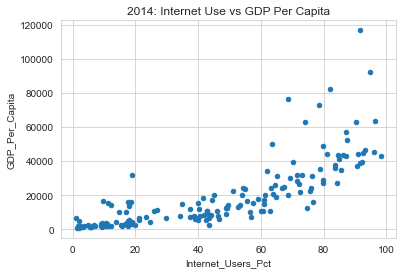

In [300]:
gdp_and_internet_use_2014.plot(kind = 'scatter', x = 'Internet_Users_Pct', y = 'GDP_Per_Capita')
plt.title('2014: Internet Use vs GDP Per Capita');

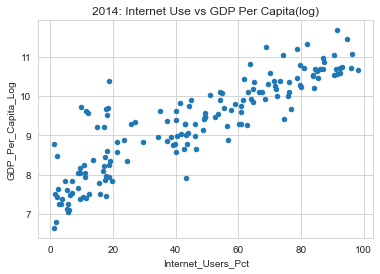

In [301]:
gdp_and_internet_use_2014.plot(kind = 'scatter', x = 'Internet_Users_Pct', y = 'GDP_Per_Capita_Log')
plt.title('2014: Internet Use vs GDP Per Capita(log)');

## 33. Filter the original dataset down to just the United States for all available years. Calculate correlation between internet use and gdp per capita. Is this meaningful or useful?

In [302]:
gdp_and_internet_use_usa =  gdp_and_internet_use.copy()
gdp_and_internet_use_usa = gdp_and_internet_use_usa[gdp_and_internet_use_usa['Country'] == 'United States']

In [303]:
gdp_and_internet_use_usa.corr()

,Year,GDP_Per_Capita,Internet_Users_Pct
Year,1.000000,0.963218,0.969113
GDP_Per_Capita,0.963218,1.000000,0.991618
Internet_Users_Pct,0.969113,0.991618,1.000000


# Solo Exploration:

In [304]:
gdp_and_internet_use[gdp_and_internet_use['Country']=='India']

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
1398,India,2014,5377.889179,Asia,18.000000
1399,India,2013,5064.558517,Asia,15.100000
1400,India,2012,4817.197501,Asia,12.580061
1401,India,2011,4624.561404,Asia,10.070000
1402,India,2010,4451.233473,Asia,7.500000
1403,India,2009,4158.385539,Asia,5.120000
1404,India,2008,3910.054508,Asia,4.380000
1405,India,2007,3848.948671,Asia,3.950000
1406,India,2006,3629.434174,Asia,2.805500
1407,India,2005,3411.017048,Asia,2.388075


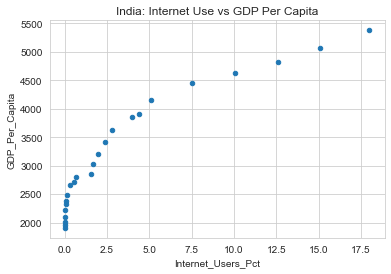

In [305]:
gdp_and_internet_use[gdp_and_internet_use['Country']=='India'].plot(kind = 'scatter', x = 'Internet_Users_Pct', y = 'GDP_Per_Capita')
plt.title('India: Internet Use vs GDP Per Capita');

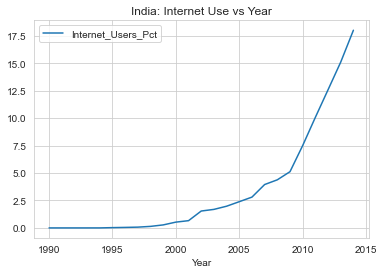

In [306]:
gdp_and_internet_use[gdp_and_internet_use['Country']=='India'].plot(kind = 'line', x = 'Year', y = 'Internet_Users_Pct')
plt.title('India: Internet Use vs Year');

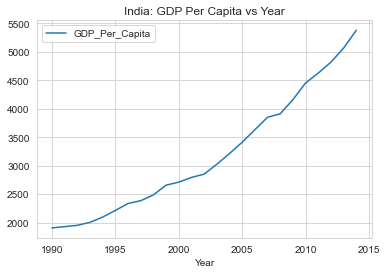

In [307]:
gdp_and_internet_use[gdp_and_internet_use['Country']=='India'].plot(kind = 'line', x = 'Year', y = 'GDP_Per_Capita')
plt.title('India: GDP Per Capita vs Year');

## 1. Choose and download another data set from the UN data http://data.un.org/Explorer.aspx to merge with your data and explore. Prepare a short (< 5 minute) presentation of your findings. Report any interesting correlations you find. Include visualizations and consider adding interactivity with ipywidgets. This presentation can be done either in a Jupyter Notebook or using another presentation software, such as PowerPoint. (Check out Jupyter Slides if you have time. This allows you to turn your jupyter notebook into a slideshow.

Internet users are individuals who have used the Internet (from any location) in the last 3 months. The Internet can be used via a computer, mobile phone, personal digital assistant, games machine, digital TV etc.
https://data.worldbank.org/indicator/IT.NET.USER.ZS?end=2019&most_recent_value_desc=false&start=1990&view=map&year=2018

Mobile cellular subscriptions (per 100 people)
Mobile cellular telephone subscriptions are subscriptions to a public mobile telephone service that provide access to the PSTN using cellular technology. The indicator includes (and is split into) the number of postpaid subscriptions, and the number of active prepaid accounts (i.e. that have been used during the last three months). The indicator applies to all mobile cellular subscriptions that offer voice communications. It excludes subscriptions via data cards or USB modems, subscriptions to public mobile data services, private trunked mobile radio, telepoint, radio paging and telemetry services.
https://data.worldbank.org/indicator/IT.CEL.SETS.P2?end=2019&most_recent_value_desc=false&start=1980&view=chart&year=2018

What country can lay claim to having the most cell phones per capita? United Arab Emirates reported more than two for each citizen. A close second is tiny Montenegro. Surprised? The countries with the most phones per person tend to be small, with lots of borders or numerous foreign workers and visitors, says Susan Teltscher, an analyst with International Telecommunication Union. (That's because visitors tend to buy local phones to use during their stay.) With UAE as a benchmark, phone companies in the U.S. and China would appear to have room to grow. Mobile-phone penetration stands at 91 percent in the U.S. and a mere 56 percent in Mainland China, according to statistics* from the ITU.

Linguistic Divides
http://labs.theguardian.com/digital-language-divide/

Fixed broadband subscriptions
Fixed broadband subscriptions refers to fixed subscriptions to high-speed access to the public Internet (a TCP/IP connection), at downstream speeds equal to, or greater than, 256 kbit/s. This includes cable modem, DSL, fiber-to-the-home/building, other fixed (wired)-broadband subscriptions, satellite broadband and terrestrial fixed wireless broadband. This total is measured irrespective of the method of payment. It excludes subscriptions that have access to data communications (including the Internet) via mobile-cellular networks. It should include fixed WiMAX and any other fixed wireless technologies. It includes both residential subscriptions and subscriptions for organizations.
https://data.worldbank.org/indicator/IT.NET.BBND?end=2019&most_recent_value_desc=false&start=1980&view=chart&year=2018

### Read in Internet Use by % of Population from the World Bank. Data is through 2019

In [308]:
internet_wb = pd.read_csv('../data/internet_use_wb.csv', skiprows=4)
internet_wb.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', 'Unnamed: 64'],
      dtype='object')

In [309]:
internet_wb = internet_wb.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', 'Unnamed: 64'])

Drop unecessary columns. Use .melt() to change from horizontal orientation to vertical, matching the original UN dataframe from above.

https://towardsdatascience.com/reshape-pandas-dataframe-with-melt-in-python-tutorial-and-visualization-29ec1450bb02

In [310]:
internet_wb = internet_wb.melt(id_vars="Country Name", 
             value_vars=['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019'], 
             var_name="Year",  # rename
             value_name="Internet_Users_Pct")  # rename

In [311]:
internet_wb.columns = ['Country', 'Year','Internet_Users_Pct']

In [312]:
internet_wb = internet_wb.dropna(axis = 'index')

In [313]:
internet_wb['Year'] = internet_wb['Year'].astype(int, errors='ignore')

### Map the country names to the dictionary

In [314]:
internet_wb['Country'] = internet_wb['Country'].map(country_dict).fillna(internet_wb['Country'])

In [315]:
internet_wb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6269 entries, 0 to 7911
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             6269 non-null   object 
 1   Year                6269 non-null   int64  
 2   Internet_Users_Pct  6269 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 195.9+ KB


In [316]:
internet_wb[internet_wb['Country'] == 'Brunei']

,Country,Year,Internet_Users_Pct


## Read in data on cellular subscriptions per 100 people

In [317]:
cell_subscriptions = pd.read_csv('../data/cellular_subscriptions.csv', skiprows=4)
cell_subscriptions.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', 'Unnamed: 64'],
      dtype='object')

In [318]:
cell_subscriptions = cell_subscriptions.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', 'Unnamed: 64'])

In [319]:
cell_subscriptions = cell_subscriptions.melt(id_vars="Country Name", 
             value_vars=['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019'], 
             var_name="Year",  # rename
             value_name="Cell_Subscriptions_Per_100")  # rename

In [320]:
cell_subscriptions.columns = ['Country', 'Year','Subscriptions_Per_100']

cell_subscriptions = cell_subscriptions.dropna(axis = 'index')

In [321]:
cell_subscriptions['Year'] = cell_subscriptions['Year'].astype(int, errors='ignore')

In [322]:
cell_subscriptions['Country'] = cell_subscriptions['Country'].map(country_dict).fillna(cell_subscriptions['Country'])

In [323]:
cell_subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7342 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                7342 non-null   object 
 1   Year                   7342 non-null   int64  
 2   Subscriptions_Per_100  7342 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 229.4+ KB


In [324]:
cell_subscriptions['Country'].nunique()

260

In [325]:
cell_subscriptions[cell_subscriptions['Country']=='Brunei']

,Country,Year,Subscriptions_Per_100


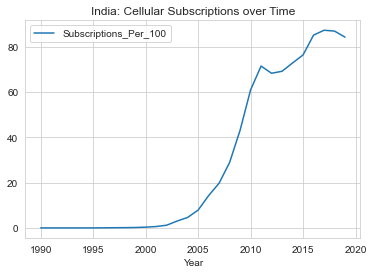

In [326]:
cell_subscriptions[cell_subscriptions['Country']=='India'].plot(kind = 'line', x = 'Year', y = 'Subscriptions_Per_100')
plt.title('India: Cellular Subscriptions over Time');

### Extract Income Group and Region from country_metadata
Keep Table Name column and rename as Country to use as key on which to join other DFs.

In [327]:
country_metadata.columns

Index(['Code', 'Long Name', 'Income Group', 'Region', 'Lending category',
       'Other groups', 'Currency Unit', 'Latest population census',
       'Latest household survey', 'Special Notes',
       'National accounts base year', 'National accounts reference year',
       'System of National Accounts', 'SNA price valuation',
       'Alternative conversion factor', 'PPP survey years',
       'Balance of Payments Manual in use', 'External debt Reporting status',
       'System of trade', 'Government Accounting concept',
       'IMF data dissemination standard',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data', '2-alpha code',
       'WB-2 code', 'Table Name', 'Short Name'],
      dtype='object')

In [328]:
income_region = country_metadata.copy()

In [329]:
income_region = income_region.drop(columns = ['Code', 'Long Name','Lending category',
       'Other groups', 'Currency Unit', 'Latest population census',
       'Latest household survey', 'Special Notes',
       'National accounts base year', 'National accounts reference year',
       'System of National Accounts', 'SNA price valuation',
       'Alternative conversion factor', 'PPP survey years',
       'Balance of Payments Manual in use', 'External debt Reporting status',
       'System of trade', 'Government Accounting concept',
       'IMF data dissemination standard',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data', '2-alpha code',
       'WB-2 code', 'Short Name'])

In [330]:
income_region.columns = ['Income Group', 'Region','Country']

## Join dataframes
income_region

internet_wb

cell_subscriptions

gdp_df

In [331]:
income_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Income Group  214 non-null    object
 1   Region        214 non-null    object
 2   Country       226 non-null    object
dtypes: object(3)
memory usage: 5.4+ KB


In [332]:
internet_wb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6269 entries, 0 to 7911
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             6269 non-null   object 
 1   Year                6269 non-null   int64  
 2   Internet_Users_Pct  6269 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 195.9+ KB


In [333]:
cell_subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7342 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                7342 non-null   object 
 1   Year                   7342 non-null   int64  
 2   Subscriptions_Per_100  7342 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 229.4+ KB


Join income_region to GDP

In [334]:
gdp_income_region = gdp_df.merge(income_region, on='Country', how='left')

In [335]:
gdp_income_region.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5334 entries, 0 to 5333
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         5334 non-null   object 
 1   Year            5334 non-null   int64  
 2   GDP_Per_Capita  5334 non-null   float64
 3   Continent       5334 non-null   object 
 4   Income Group    5322 non-null   object 
 5   Region          5322 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 291.7+ KB


Join resulting gdp_income_region to internet_wb

In [336]:
gdp_income_region_internet = gdp_income_region.merge(internet_wb, on=['Country','Year'], how ='left')

In [337]:
gdp_income_region_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5334 entries, 0 to 5333
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             5334 non-null   object 
 1   Year                5334 non-null   int64  
 2   GDP_Per_Capita      5334 non-null   float64
 3   Continent           5334 non-null   object 
 4   Income Group        5322 non-null   object 
 5   Region              5322 non-null   object 
 6   Internet_Users_Pct  4558 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 333.4+ KB


In [338]:
gdp_int_cell = gdp_income_region_internet.merge(cell_subscriptions, on=['Country','Year'], how ='left')

In [339]:
gdp_int_cell.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5334 entries, 0 to 5333
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                5334 non-null   object 
 1   Year                   5334 non-null   int64  
 2   GDP_Per_Capita         5334 non-null   float64
 3   Continent              5334 non-null   object 
 4   Income Group           5322 non-null   object 
 5   Region                 5322 non-null   object 
 6   Internet_Users_Pct     4558 non-null   float64
 7   Subscriptions_Per_100  5224 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 375.0+ KB


In [340]:
gdp_int_cell = gdp_int_cell.dropna()

In [341]:
gdp_int_cell.columns=['Country', 'Year', 'GDP_Per_Capita', 'Continent', 'Income_Group',
       'Region', 'Internet_Users_Pct', 'Subscriptions_Per_100']

In [342]:
gdp_int_cell.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4528 entries, 1 to 5333
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                4528 non-null   object 
 1   Year                   4528 non-null   int64  
 2   GDP_Per_Capita         4528 non-null   float64
 3   Continent              4528 non-null   object 
 4   Income_Group           4528 non-null   object 
 5   Region                 4528 non-null   object 
 6   Internet_Users_Pct     4528 non-null   float64
 7   Subscriptions_Per_100  4528 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 318.4+ KB


In [343]:
gdp_int_cell = gdp_int_cell[(gdp_int_cell['Year'] < 2019) &(gdp_int_cell['Year'] >= 1995)]

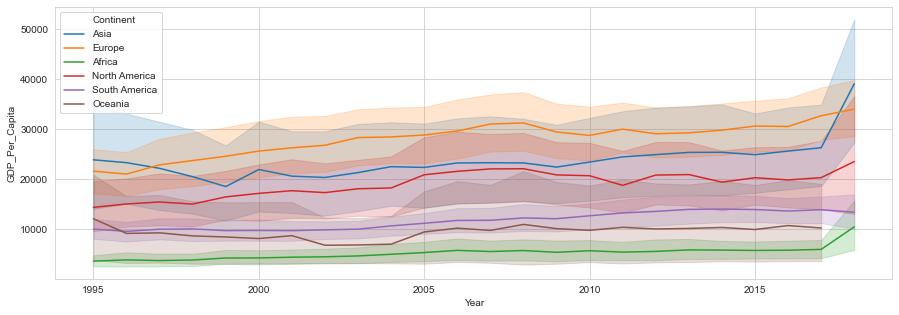

In [346]:
plt.figure(figsize=(15,5))

sns.lineplot(data= gdp_int_cell, x = 'Year', y='GDP_Per_Capita', hue ='Continent');

In [347]:
gdp_int_cell.corr()

,Year,GDP_Per_Capita,Internet_Users_Pct,Subscriptions_Per_100
Year,1.000000,0.096831,0.610729,0.748091
GDP_Per_Capita,0.096831,1.000000,0.596671,0.465098
Internet_Users_Pct,0.610729,0.596671,1.000000,0.803053
Subscriptions_Per_100,0.748091,0.465098,0.803053,1.000000


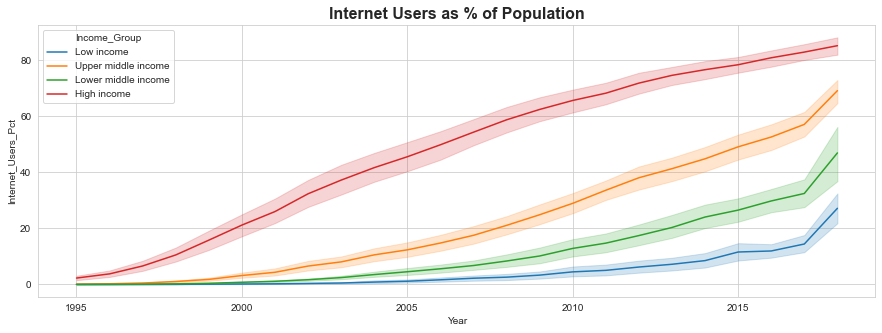

In [373]:
plt.figure(figsize=(15,5))
sns.set_style("whitegrid")
sns.lineplot(data= gdp_int_cell, x = 'Year', y='Internet_Users_Pct', hue ='Income_Group')
plt.title('Internet Users as % of Population', fontsize = fontsize, fontweight = 'bold');

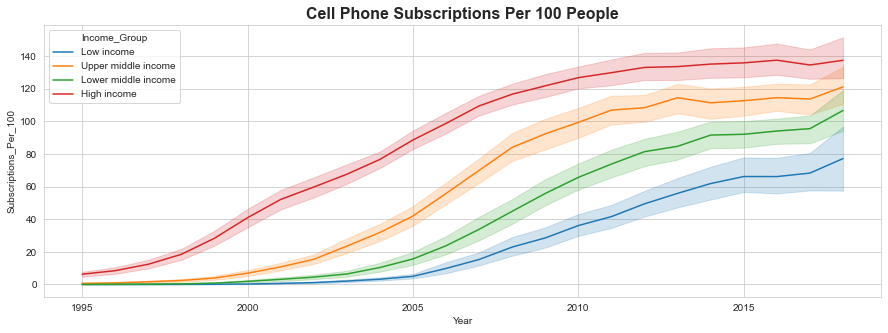

In [397]:
plt.figure(figsize=(15,5))
sns.set_style("whitegrid")
sns.lineplot(data= gdp_int_cell, x = 'Year', y='Subscriptions_Per_100', hue ='Income_Group')
plt.title('Cell Phone Subscriptions Per 100 People', fontsize = fontsize, fontweight = 'bold');

In [351]:
gdp_int_cell[gdp_int_cell['Income_Group']== "Low income"]['Country'].unique()

array(['Afghanistan', 'Burkina Faso', 'Burundi',
       'Central African Republic', 'Chad', 'Congo, Dem. Rep.', 'Eritrea',
       'Ethiopia', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Liberia',
       'Madagascar', 'Malawi', 'Mali', 'Mozambique', 'Niger', 'Rwanda',
       'Sierra Leone', 'South Sudan', 'Sudan', 'Tajikistan',
       'Gambia, The', 'Togo', 'Uganda', 'Yemen, Rep.'], dtype=object)

In [352]:
gdp_int_cell[gdp_int_cell['Income_Group']== "Low income"].corr()

,Year,GDP_Per_Capita,Internet_Users_Pct,Subscriptions_Per_100
Year,1.000000,0.172227,0.669695,0.812455
GDP_Per_Capita,0.172227,1.000000,0.444500,0.325744
Internet_Users_Pct,0.669695,0.444500,1.000000,0.765464
Subscriptions_Per_100,0.812455,0.325744,0.765464,1.000000


In [353]:
gdp_int_cell[gdp_int_cell['Income_Group']== "Low income"].describe()

,Year,GDP_Per_Capita,Internet_Users_Pct,Subscriptions_Per_100
count,525.000000,525.000000,525.000000,525.000000
mean,2006.575238,1511.351174,3.880696,24.874465
std,6.434087,795.525657,6.027583,30.159108
min,1995.000000,508.334080,0.000000,0.000000
25%,2001.000000,920.626618,0.142546,0.400170
50%,2007.000000,1378.565013,0.920000,11.097271
75%,2012.000000,1758.465636,4.866224,41.582841
max,2018.000000,4566.157400,33.000000,138.805137


In [354]:
gdp_int_cell[gdp_int_cell['Income_Group']== "Lower middle income"]['Country'].unique()

array(['Algeria', 'Angola', 'Bangladesh', 'Benin', 'Bhutan', 'Bolivia',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Comoros', 'Congo, Rep.',
       'Djibouti', 'Egypt, Arab Rep.', 'El Salvador', 'Eswatini', 'Ghana',
       'Honduras', 'India', 'Kenya', 'Kiribati', 'Kyrgyz Republic',
       'Lao PDR', 'Lesotho', 'Mauritania', 'Micronesia, Fed. Sts.',
       'Moldova', 'Mongolia', 'Morocco', 'Myanmar', 'Nepal', 'Nicaragua',
       'Nigeria', 'Pakistan', 'Papua New Guinea', 'Philippines',
       'Senegal', 'Solomon Islands', 'Sri Lanka', 'Tanzania',
       'Timor-Leste', 'Tunisia', 'Ukraine', 'Uzbekistan', 'Vanuatu',
       'Vietnam', 'West Bank and Gaza', 'Zambia', 'Zimbabwe'],
      dtype=object)

In [355]:
gdp_int_cell[gdp_int_cell['Income_Group']== "Lower middle income"].corr()

,Year,GDP_Per_Capita,Internet_Users_Pct,Subscriptions_Per_100
Year,1.000000,0.321970,0.711092,0.840285
GDP_Per_Capita,0.321970,1.000000,0.463480,0.477273
Internet_Users_Pct,0.711092,0.463480,1.000000,0.768925
Subscriptions_Per_100,0.840285,0.477273,0.768925,1.000000


In [356]:
gdp_int_cell[gdp_int_cell['Income_Group']== "Upper middle income"]['Country'].unique()

array(['Albania', 'Argentina', 'Armenia', 'Azerbaijan', 'Belarus',
       'Belize', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'China', 'Colombia', 'Costa Rica', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Equatorial Guinea', 'Fiji',
       'Gabon', 'Georgia', 'Grenada', 'Guatemala', 'Guyana', 'Indonesia',
       'Iran, Islamic Rep.', 'Iraq', 'Jamaica', 'Jordan', 'Kazakhstan',
       'Lebanon', 'Libya', 'Malaysia', 'Maldives', 'Marshall Islands',
       'Mexico', 'Montenegro', 'Namibia', 'North Macedonia', 'Paraguay',
       'Peru', 'Russian Federation', 'Samoa', 'Serbia', 'South Africa',
       'St. Lucia', 'St. Vincent and the Grenadines', 'Suriname',
       'Thailand', 'Tonga', 'Turkey', 'Turkmenistan', 'Tuvalu',
       'Venezuela, RB'], dtype=object)

In [357]:
gdp_int_cell[gdp_int_cell['Income_Group']== "Upper middle income"].corr()

,Year,GDP_Per_Capita,Internet_Users_Pct,Subscriptions_Per_100
Year,1.000000,0.376364,0.844306,0.856020
GDP_Per_Capita,0.376364,1.000000,0.397117,0.437675
Internet_Users_Pct,0.844306,0.397117,1.000000,0.794957
Subscriptions_Per_100,0.856020,0.437675,0.794957,1.000000


In [358]:
gdp_int_cell[gdp_int_cell['Income_Group']== "High income"]['Country'].unique()

array(['Antigua and Barbuda', 'Aruba', 'Australia', 'Austria', 'Bahrain',
       'Barbados', 'Belgium', 'Bermuda', 'Brunei Darussalam', 'Canada',
       'Cayman Islands', 'Chile', 'Croatia', 'Cyprus', 'Czech Republic',
       'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Hong Kong SAR, China', 'Hungary', 'Iceland', 'Ireland', 'Israel',
       'Italy', 'Japan', 'Korea, Rep.', 'Kuwait', 'Latvia', 'Lithuania',
       'Luxembourg', 'Macao SAR, China', 'Malta', 'Mauritius',
       'Netherlands', 'New Zealand', 'Norway', 'Oman', 'Palau', 'Panama',
       'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Romania',
       'San Marino', 'Saudi Arabia', 'Seychelles', 'Singapore',
       'Slovak Republic', 'Slovenia', 'Spain', 'St. Kitts and Nevis',
       'Sweden', 'Switzerland', 'Bahamas, The', 'Trinidad and Tobago',
       'United Arab Emirates', 'United Kingdom', 'United States',
       'Uruguay'], dtype=object)

gdp_int_cell[gdp_int_cell['Income_Group']== "High income"].corr()

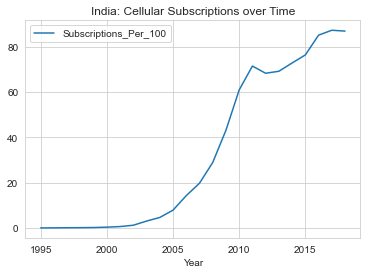

In [359]:
gdp_int_cell[gdp_int_cell['Country']=='India'].plot(kind = 'line', x = 'Year', y = 'Subscriptions_Per_100')
plt.title('India: Cellular Subscriptions over Time');

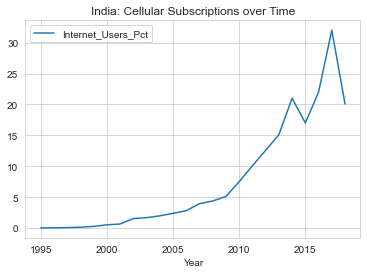

In [377]:
plt.figsize = (8, 6)
gdp_int_cell[gdp_int_cell['Country']=='India'].plot(kind = 'line', x = 'Year', y = 'Internet_Users_Pct')
plt.title('India: Cellular Subscriptions over Time');

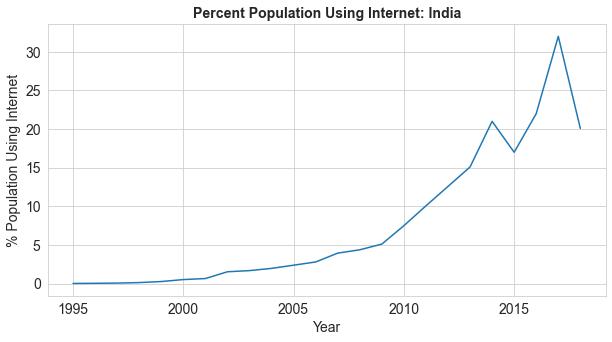

In [388]:
fontsize = 14
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.lineplot(data= gdp_int_cell.query("Country == 'India'"), x = 'Year', y='Internet_Users_Pct')
plt.xticks(fontsize = fontsize)
plt.xlabel('Year', fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.ylabel('% Population Using Internet', fontsize = fontsize)
plt.title('Percent Population Using Internet: India', fontsize = fontsize, fontweight = 'bold');

In [391]:
gdp_int_cell_bi = gdp_int_cell[(gdp_int_cell['Country'] == 'India')|(gdp_int_cell['Country'] == 'Bulgaria')]

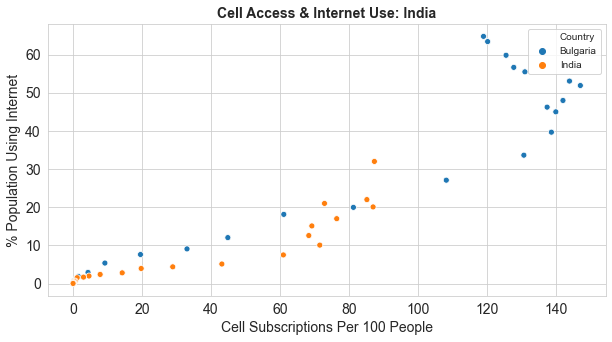

In [392]:
fontsize = 14
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.scatterplot(data= gdp_int_cell_bi, x = 'Subscriptions_Per_100', y='Internet_Users_Pct', hue='Country')
plt.xticks(fontsize = fontsize)
plt.xlabel('Cell Subscriptions Per 100 People', fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.ylabel('% Population Using Internet', fontsize = fontsize)
plt.title('Cell Access & Internet Use: India', fontsize = fontsize, fontweight = 'bold');

''

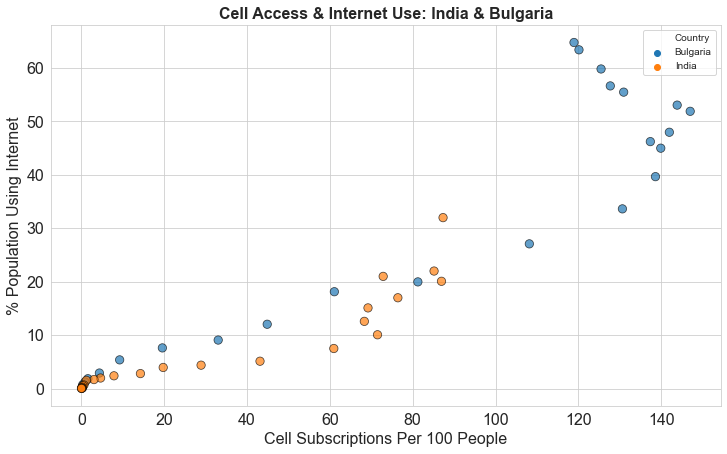

In [395]:
fontsize = 16

plt.figure(figsize = (12,7))
sns.scatterplot(data = gdp_int_cell_bi, x = 'Subscriptions_Per_100', y = 'Internet_Users_Pct', s = 70,
                hue = 'Country',
                alpha = 0.7, edgecolor = 'black')
plt.xticks(fontsize = fontsize)
plt.xlabel('Cell Subscriptions Per 100 People', fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.ylabel('% Population Using Internet', fontsize = fontsize)
plt.title('Cell Access & Internet Use: India & Bulgaria', fontsize = fontsize, fontweight = 'bold')
;

In [361]:
#gdp_pivoted['Percent_Change'] = 100 * (gdp_pivoted[2017] - gdp_pivoted[1990]) / gdp_pivoted[1990]

#gdp_pivoted_negative = gdp_pivoted[gdp_pivoted["Percent_Change"] < 0]
#gdp_pivoted_negative_sorted = gdp_pivoted_negative.sort_values(by=['Percent_Change'])
#gdp_pivoted_negative_sorted

In [362]:
gdp_int_cell[gdp_int_cell['Country']== "India"].corr()

,Year,GDP_Per_Capita,Internet_Users_Pct,Subscriptions_Per_100
Year,1.000000,0.976498,0.887686,0.942786
GDP_Per_Capita,0.976498,1.000000,0.942002,0.960373
Internet_Users_Pct,0.887686,0.942002,1.000000,0.918997
Subscriptions_Per_100,0.942786,0.960373,0.918997,1.000000


In [363]:
gdp_int_cell[gdp_int_cell['Country']== "Bulgaria"].corr()

,Year,GDP_Per_Capita,Internet_Users_Pct,Subscriptions_Per_100
Year,1.000000,0.981417,0.984644,0.891095
GDP_Per_Capita,0.981417,1.000000,0.989534,0.922870
Internet_Users_Pct,0.984644,0.989534,1.000000,0.923180
Subscriptions_Per_100,0.891095,0.922870,0.923180,1.000000


In [364]:
gdp_int_cell[gdp_int_cell['Country']== "United States"].corr()

,Year,GDP_Per_Capita,Internet_Users_Pct,Subscriptions_Per_100
Year,1.000000,0.957319,0.914551,0.994539
GDP_Per_Capita,0.957319,1.000000,0.970576,0.970233
Internet_Users_Pct,0.914551,0.970576,1.000000,0.936627
Subscriptions_Per_100,0.994539,0.970233,0.936627,1.000000


sns.boxplot(data=df[['mi', 'steps', 'Standing time', 'lying time']])


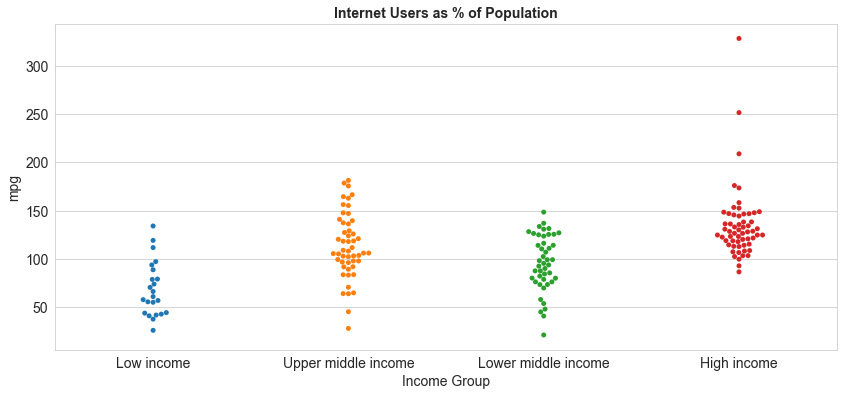

In [365]:
fontsize = 14

plt.subplots(figsize = (14, 6))
sns.swarmplot(data = gdp_int_cell.query("Year == '2017'"), x = 'Income_Group', y = 'Subscriptions_Per_100')
plt.xticks(fontsize = fontsize)
plt.xlabel('Income Group', fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.ylabel('mpg', fontsize = fontsize)
plt.title('Internet Users as % of Population', fontsize = fontsize, fontweight = 'bold');

''

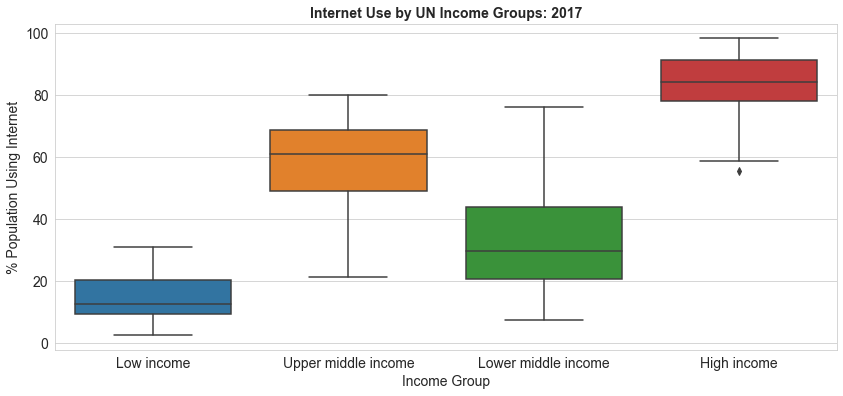

In [366]:
fontsize = 14

sns.color_palette("colorblind")
plt.subplots(figsize = (14, 6))
sns.boxplot(data = gdp_int_cell.query("Year == '2017'"), x = 'Income_Group', y = 'Internet_Users_Pct')
plt.xticks(fontsize = fontsize)
plt.xlabel('Income Group', fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.ylabel('% Population Using Internet', fontsize = fontsize)
plt.title('Internet Use by UN Income Groups: 2017', fontsize = fontsize, fontweight = 'bold')

;

''

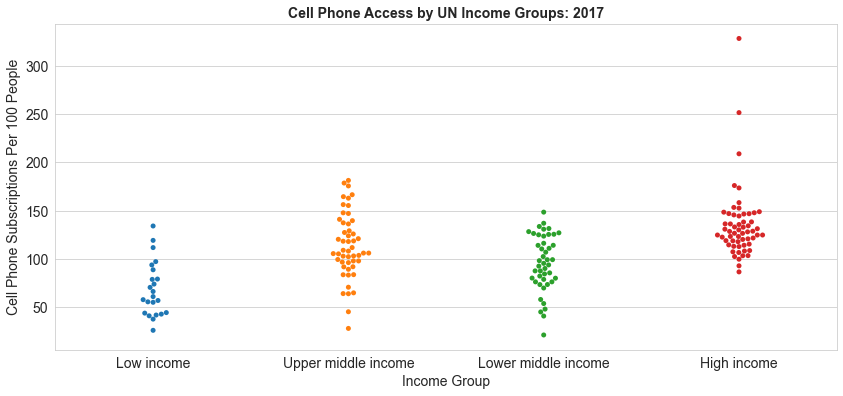

In [398]:
fontsize = 14

sns.color_palette("colorblind")
plt.subplots(figsize = (14, 6))
sns.swarmplot(data = gdp_int_cell.query("Year == '2017'"), x = 'Income_Group', y = 'Subscriptions_Per_100')
plt.xticks(fontsize = fontsize)
plt.xlabel('Income Group', fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.ylabel('Cell Phone Subscriptions Per 100 People', fontsize = fontsize)
plt.title('Cell Phone Access by UN Income Groups: 2017', fontsize = fontsize, fontweight = 'bold')

;


In [404]:
gdp_int_cell[gdp_int_cell['Year']== 2017].sort_values(by='Subscriptions_Per_100', ascending=False)

,Country,Year,GDP_Per_Capita,Continent,Income_Group,Region,Internet_Users_Pct,Subscriptions_Per_100
2776,"Macao SAR, China",2017,105773.834483,Asia,High income,East Asia & Pacific,83.174089,328.790446
2009,"Hong Kong SAR, China",2017,56093.693193,Asia,High income,East Asia & Pacific,89.415945,251.765006
4991,United Arab Emirates,2017,66477.818719,Asia,High income,Middle East & North Africa,94.819923,208.978600
2892,Maldives,2017,13201.418021,Asia,Upper middle income,South Asia,63.185666,181.328842
1127,Costa Rica,2017,15430.308631,North America,Upper middle income,Latin America & Caribbean,71.581665,178.594427
2519,Kuwait,2017,65166.851434,Asia,High income,Middle East & North Africa,97.999989,176.002435
4625,Thailand,2017,16285.637366,Asia,Upper middle income,East Asia & Pacific,52.891929,175.596494
4099,Seychelles,2017,26415.806704,Africa,High income,Sub-Saharan Africa,58.769811,173.496650
3172,Montenegro,2017,16477.384821,Europe,Upper middle income,Europe & Central Asia,71.272333,166.465200
2124,Indonesia,2017,11161.021202,Asia,Upper middle income,East Asia & Pacific,32.335806,164.440590


### Read in data on (native) language spoken by gender from the UN.

In [ ]:
languages = pd.read_csv('../data/language_diversity.csv')[:- 83]
languages.info()

In [ ]:
languages[['Year', 'Source Year','Value']] = languages[['Year', 'Source Year','Value']].astype(int, errors='ignore')

In [ ]:
languages.columns=['Country', 'Year','Area', 'Sex', 'Language', 'Record_Type',
       'Reliability', 'Source_Year', 'Value', 'Value Footnotes']

In [ ]:
languages['Record Type'].unique()

In [ ]:
languages.Country.unique()

In [ ]:
languages[languages['Country']== 'India']

Footnotes for India:
Data refer to the 22 scheduled languages of the Eighth Schedule of the Indian Constitution.
Includes data for the Indian-held part of Jammu and Kashmir, the final status of which has not yet been determined.

In [ ]:
languages[(languages['Country']== 'Australia') & (languages['Area']=='Total') & (languages['Sex']== 'Both Sexes')&(languages['Value'] > 100)]['Language'].nunique()

In [ ]:
#Include only higher level observations - looking for the total number of reported languages between men and women, rural and urban for a given country.
languages = languages[(languages['Area']=='Total') & (languages['Sex']== 'Both Sexes')]

In [ ]:
languages.info()

In [ ]:
languages[languages['Language']!='Total']['Language'].nunique()

In [ ]:
languages[languages['Language']!='Total'].groupby('Country')['Language'].nunique()

## 2. If time allows, check out the plotly library to add additional interativity to your plots. https://plotly.com/python/plotly-express/).